<a href="https://colab.research.google.com/github/pacnpacn/BUGAN/blob/master/notebook_deprecated/StyleGAN2_Rectangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE: does not work at the moment!

# StyleGAN2 Rectangular

StyleGAN2 reimplementation with rectangular image support: https://github.com/nolan-dev/stylegan_reimplementation

Original stylegan2 notebook: https://github.com/parthsuresh/stylegan2-colab
/Parth Suresh, 2020 + Mikael Christensen, 2019

In [1]:
# Set a tag for _your_ experiments, for example your name.

my_tag = 'mathis-testing'
assert my_tag, "Please set a tag above"

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
%cd /content/

# Download the original implementation
# !git clone https://github.com/NVlabs/stylegan2.git
# %cd stylegan2
# !nvcc test_nvcc.cu -o test_nvcc -run

# Download stylegan2 implementation
!git clone https://github.com/nolan-dev/stylegan_reimplementation

print('Tensorflow version: {}'.format(tf.__version__) )
!nvidia-smi -L
print('GPU Identified at: {}'.format(tf.test.gpu_device_name()))

TensorFlow 1.x selected.


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

/content
fatal: destination path 'stylegan2' already exists and is not an empty directory.
fatal: destination path 'stylegan_reimplementation' already exists and is not an empty directory.
Tensorflow version: 1.15.2
GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-d416213c-98f7-e365-2704-03197666d7cc)
GPU Identified at: /device:GPU:0


We need to upload our data to this runtime. I found copying individual files from the drive is very slow, copying a zip file from my computer is also slow but copying a big zip file from drive is very fast, so let's do that.

To find the folder the first time we need to **have a shortcut of our shared folder to the personal google drive**.

Go to google drive → "Shared with me" → "IRCMS_GAN_collaborative_database" → Right click → "Add shortcut to drive"



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!rsync -avP /content/drive/My\ Drive/IRCMS_GAN_collaborative_database/Research/Daniel/ALL\ CROP.zip /content/

sending incremental file list
ALL CROP.zip
    214,122,378 100%   55.17MB/s    0:00:03 (xfr#1, to-chk=0/1)

sent 214,174,739 bytes  received 35 bytes  38,940,868.00 bytes/sec
total size is 214,122,378  speedup is 1.00


In [5]:
%cd /content
!rm -rf ALL\ CROP
!unzip -q ALL\ CROP.zip
!mv ALL\ CROP train_set

/content


In [6]:
import os

path = "/content/train_set/"

from fastai.vision import verify_images
verify_images(path, delete=True)

In [19]:
from PIL import Image
from tqdm import tqdm

%cd /content
!mkdir -p /content/custom/
path = "/content/train_set/"
files = os.listdir(path)

# All sizes MUST be powers of two: 64, 128, 256, 512 etc.
desired_size = (256, 128)
crop_method = "top"

def resize():
    files = list(os.listdir(path))
    for i, f in tqdm(list(enumerate(files))):
        im = Image.open(path + f)

        old_w, old_h = im.size 
        desired_w, desired_h = desired_size
        ratio_w = desired_w / old_w
        ratio_h = desired_h / old_h
        if ratio_w > ratio_h:
            scale_size = desired_w, int(old_h * ratio_w)
        else:
            scale_size = int(old_w * ratio_h), desired_h

        scale_w, scale_h = scale_size
        im = im.resize(scale_size, Image.ANTIALIAS)

        # left, upper, right, and lower pixel coordinate
        if crop_method == "top":
            left = (scale_w - desired_w) // 2
            upper = 0
            right = left + desired_w
            lower = desired_h
        elif crop_method == "center":
            left = (scale_w - desired_w) // 2
            upper = (scale_h - desired_h) // 2
            right = left + desired_w
            lower = upper + desired_h
        else:
            raise ValueError("Only cropt methods 'top' and 'center' supported.")

        im = im.crop((left, upper, right, lower))

        if im.size != desired_size:
            raise ValueError(f"Image {path + f} wrongly resized to {im.size}")

        im.save("/content/custom/" + f , 'JPEG')

resize()

/content


100%|██████████| 2862/2862 [00:16<00:00, 174.77it/s]


hand-business-person-who-chatting-260nw-1574081251.jpg


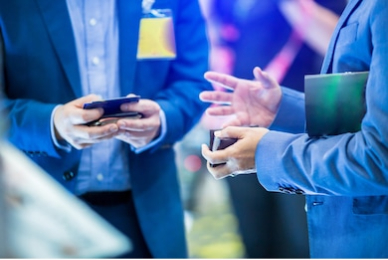

resized to:


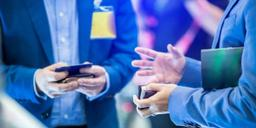


closeup-businessman-grey-suit-giving-260nw-795313789.jpg


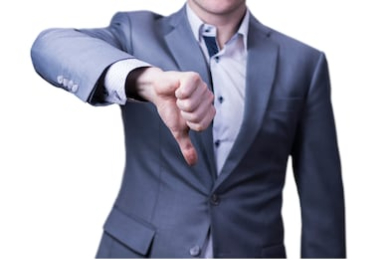

resized to:


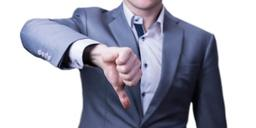


portrait-business-woman-relax-officehappy-260nw-1673903083.jpg.jpg


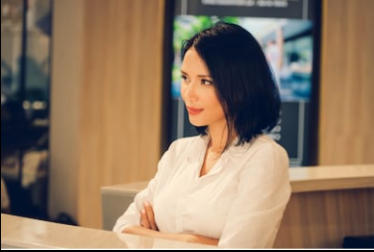

resized to:


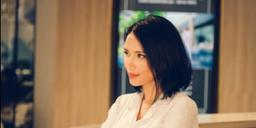

In [24]:
# Check a few images to make sure we didn't mess them up.
from IPython.display import Image
import glob
for img in list(glob.glob("/content/custom/*"))[:3]:
    basename = os.path.basename(img)
    print(basename)
    display(Image(os.path.join(path, basename)))
    print("resized to:")
    display(Image(img))
    print()

In [51]:
tfrecord_dir =  "/content/datasets/custom"
image_dir = "/content/custom/"
shuffle = True

%rm $tfrecord_dir/*

import numpy as np
import PIL

# The original is in NVLabs/stylegan2
# Changed: 
#  - Naming of tfrecords files: it's now: I think it is now "res{horizontal_res}.tfrecords".
#  - Allow non-square images.

class TFRecordExporter:
    def __init__(self, tfrecord_dir, expected_images, print_progress=True, progress_interval=10):
        self.tfrecord_dir       = tfrecord_dir
        self.tfr_prefix         = os.path.join(self.tfrecord_dir, os.path.basename(self.tfrecord_dir))
        self.expected_images    = expected_images
        self.cur_images         = 0
        self.shape              = None
        self.resolution_log2    = None
        self.tfr_writers        = []
        self.print_progress     = print_progress
        self.progress_interval  = progress_interval

        if self.print_progress:
            print('Creating dataset "%s"' % tfrecord_dir)
        if not os.path.isdir(self.tfrecord_dir):
            os.makedirs(self.tfrecord_dir)
        assert os.path.isdir(self.tfrecord_dir)

    def close(self):
        if self.print_progress:
            print('%-40s\r' % 'Flushing data...', end='', flush=True)
        for tfr_writer in self.tfr_writers:
            tfr_writer.close()
        self.tfr_writers = []
        if self.print_progress:
            print('%-40s\r' % '', end='', flush=True)
            print('Added %d images.' % self.cur_images)

    def choose_shuffled_order(self): # Note: Images and labels must be added in shuffled order.
        order = np.arange(self.expected_images)
        np.random.RandomState(123).shuffle(order)
        return order

    def add_image(self, img):
        if self.print_progress and self.cur_images % self.progress_interval == 0:
            print('%d / %d\r' % (self.cur_images, self.expected_images), end='', flush=True)
        if self.shape is None:
            self.shape = img.shape
            self.resolution_log2 = int(np.log2(self.shape[1]))
            assert self.shape[0] in [1, 3]
            #assert self.shape[1] == self.shape[2]
            assert self.shape[1] == 2**self.resolution_log2
            tfr_opt = tf.python_io.TFRecordOptions(tf.python_io.TFRecordCompressionType.NONE)
            for lod in range(self.resolution_log2 - 1):
                #tfr_file = self.tfr_prefix + '-res%02d.tfrecords' % (self.resolution_log2 - lod)
                # NOTE: not sure what the expected names really are
                tfr_file = self.tfr_prefix + f'-res{2**(lod + 2)}.tfrecords'
                self.tfr_writers.append(tf.python_io.TFRecordWriter(tfr_file, tfr_opt))
        assert img.shape == self.shape
        for lod, tfr_writer in enumerate(self.tfr_writers):
            if lod:
                img = img.astype(np.float32)
                img = (img[:, 0::2, 0::2] + img[:, 0::2, 1::2] + img[:, 1::2, 0::2] + img[:, 1::2, 1::2]) * 0.25
            quant = np.rint(img).clip(0, 255).astype(np.uint8)
            ex = tf.train.Example(features=tf.train.Features(feature={
                'shape': tf.train.Feature(int64_list=tf.train.Int64List(value=quant.shape)),
                'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
            tfr_writer.write(ex.SerializeToString())
        self.cur_images += 1

    def add_labels(self, labels):
        if self.print_progress:
            print('%-40s\r' % 'Saving labels...', end='', flush=True)
        assert labels.shape[0] == self.cur_images
        with open(self.tfr_prefix + '-rxx.labels', 'wb') as f:
            np.save(f, labels.astype(np.float32))

    def __enter__(self):
        return self

    def __exit__(self, *args):
        self.close()


print('Loading images from "%s"' % image_dir)
image_filenames = sorted(glob.glob(os.path.join(image_dir, '*')))
if len(image_filenames) == 0:
    error('No input images found')

img = np.asarray(PIL.Image.open(image_filenames[0]))
resolution = img.shape[0]
channels = img.shape[2] if img.ndim == 3 else 1
# if img.shape[0:2] != desired_size:
#     error(f"Input images must have size {desired_size}")
# if resolution != 2 ** int(np.floor(np.log2(resolution))):
#     error('Input image resolution must be a power-of-two')
# if channels not in [1, 3]:
#     error('Input images must be stored as RGB or grayscale')

with TFRecordExporter(tfrecord_dir, len(image_filenames)) as tfr:
    order = tfr.choose_shuffled_order() if shuffle else np.arange(len(image_filenames))
    for idx in range(order.size):
        img = np.asarray(PIL.Image.open(image_filenames[order[idx]]))
        if channels == 1:
            img = img[np.newaxis, :, :] # HW => CHW
        else:
            img = img.transpose([2, 0, 1]) # HWC => CHW
        tfr.add_image(img)

Loading images from "/content/custom/"
Creating dataset "/content/datasets/custom"
Added 2862 images.


In [52]:
!ls -lah /content/datasets/custom/

total 359M
drwxr-xr-x 2 root root 4.0K Jul 21 08:30 .
drwxr-xr-x 3 root root 4.0K Jul 21 07:54 ..
-rw-r--r-- 1 root root 411K Jul 21 08:31 custom-res128.tfrecords
-rw-r--r-- 1 root root  17M Jul 21 08:31 custom-res16.tfrecords
-rw-r--r-- 1 root root 4.4M Jul 21 08:31 custom-res32.tfrecords
-rw-r--r-- 1 root root 269M Jul 21 08:31 custom-res4.tfrecords
-rw-r--r-- 1 root root 1.2M Jul 21 08:31 custom-res64.tfrecords
-rw-r--r-- 1 root root  68M Jul 21 08:31 custom-res8.tfrecords


In [7]:
%cd /content/stylegan_reimplementation/

/content/stylegan_reimplementation


In [9]:
# Rewriting this file because tf.contrib.gan does not exist in tf 1.15. Use tfgan instead.

%%writefile train.py
import os
import ast
from collections import namedtuple
#from tensorflow.python import debug as tf_debug
from shutil import copy, copytree
from tqdm import trange
import csv
import random

import tensorflow as tf
import tensorflow_gan as tfgan
import numpy as np

from data import get_dataset
from models import Generator, Discriminator, MappingNetwork
from ops import name_scope, upsample, downsample, downsample_nv
from utils import filter_vars_with_checkpoint, build_label_list_from_file

TrainHps = namedtuple("TrainingHyperparams",
                      ["res_h", "res_w", "current_res_w", "psi_w", "batch_size", "epochs_per_res",
                       "optimizer", "loss_fn", "profile", "ngpus",
                       "learning_rate", "adam_beta1", "adam_beta2", "use_beholder",
                       "model_dir", "gp_fn", "lambda_gp", "ncritic", "cond_uniform_fake",
                       "do_pixel_norm", "start_res_h", "start_res_w", "map_cond",
                       "tboard_debug", "cli_debug", "cond_weight", "cond_layers",
                       "eager", "no_train", "lambda_drift", "conditional_type",
                       "do_equalized_lr", "do_minibatch_stddev", "label_file",
                       "steps_per_save", "save_paths", "do_traditional_input",
                       "do_mapping_network", "do_add_noise", "resize_method"])
TrainHps.__new__.__defaults__ = (None,) * len(TrainHps._fields)

SavePaths = namedtuple("SavePaths",
                       ["gen_model", "dis_model", "mapping_network", "sampling_model",
                        "gen_optim", "dis_optim", "mn_optim", "alpha", "step"])
SavePaths.__new__.__defaults__ = (None,) * len(SavePaths._fields)

@name_scope("non_saturating_loss")
def non_saturating_loss(real_logit, fake_logit):
    """
    :param real_logit: logit(s) for real images (if None just return generator loss)
    :param fake_logit: logit(s) for fake images
    :return: loss for discriminator and generator (unless real_logit is None)
    """
    loss_generator = .5 * tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        labels=tf.ones_like(fake_logit),
        logits=fake_logit))
    if real_logit is None:
        return loss_generator
    loss_discriminator_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        labels=tf.ones_like(real_logit),
        logits=real_logit))
    loss_discriminator_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        labels=tf.zeros_like(fake_logit),
        logits=fake_logit))
    loss_discriminator = .5 * loss_discriminator_real + .5 * loss_discriminator_fake
    return loss_discriminator, loss_generator


@name_scope("wasserstein_loss")
def wasserstein_loss(real_logit, fake_logit):
    """
    :param real_logit: logit(s) for real images (if None just return generator loss)
    :param fake_logit: logit(s) for fake images
    :return: loss for discriminator and generator (unless real_logit is None)
    """
    loss_generator = - fake_logit
    if real_logit is None:
        return loss_generator
    loss_discriminator_real = - real_logit
    loss_discriminator_fake = fake_logit
    #  this actually negates the need for a bias in the FC layer, it's cancelled out
    loss_discriminator = loss_discriminator_real + loss_discriminator_fake
    return loss_discriminator, loss_generator


@name_scope("drift_penalty")
def drift_penalty(real_logit):
    return tf.square(real_logit)


@name_scope("interpolates")
def get_interpolates(real_data, fake_data, alpha_interpolates=None):
    if alpha_interpolates is None:
        alpha_interpolates = tf.random_uniform([real_data.get_shape().as_list()[0], 1, 1, 1], 0., 1.)
    return alpha_interpolates*fake_data + (1-alpha_interpolates)*real_data


@name_scope("R1_gp")
def r1_gp(fake_image, real_image, dis_model, alpha, label_dict=None, conditional_type=None, **kwargs):
    output_sum = 0
    if conditional_type == "acgan":
        output, class_logits = dis_model(real_image, alpha=alpha, y=None)
        if class_logits is not None:
            for label in label_dict.keys():
                output_sum = output_sum + tf.reduce_sum(class_logits[label])
    elif conditional_type == "proj":
        output, _ = dis_model(real_image,
                              alpha=alpha,
                              y=tf.concat([label_dict[l] for l in label_dict.keys()], axis=-1))
    else:
        output, _ = dis_model(real_image,
                              alpha=alpha,
                              y=None)

    # sum of outputs for each image in batch.  The derivative of a output for an image from a different
    # batch should be 0, so this won't scale with batch size
    # todo: is the sum even necessary?
    output_sum = output_sum + tf.reduce_sum(output)
    grads = tf.gradients(output_sum, [real_image])[0]
    # all but first axis (usually [1,2,3]) or the first axis if only that is available
    axis = np.arange(1, grads.get_shape().ndims) if grads.get_shape().ndims is not 1 else None
    l2_squared_grads = tf.reduce_sum(tf.square(grads), axis=axis)
    penalty = l2_squared_grads * 0.5
    return penalty


@name_scope("l2_gp")
def l2_gp(input, output):
    if output.get_shape().ndims not in [0, 1, 2]:
        raise ValueError("output should be ranks 0 to 2 (list of losses or single loss)")
    grads = tf.gradients(output, [input])[0]

    # all but first axis (usually [1,2,3]) or the first axis if only that is available
    axis = np.arange(1, grads.get_shape().ndims) if grads.get_shape().ndims is not 1 else None
    l2_grads = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=axis))

    penalty = tf.square(l2_grads-1.)
    return penalty


@name_scope("wgan_gp")
def wgan_gp(fake_image, real_image, dis_model, alpha, alpha_interpolates=None):
    interps = get_interpolates(real_image, fake_image, alpha_interpolates)
    output = tf.reduce_sum(dis_model(interps, alpha=alpha))
    return l2_gp(interps, output)


@name_scope("wgan_gp_eager")
def wgan_gp_eager(fake_image, real_image, dis_model, alpha, alpha_interpolates=None):
    interps = get_interpolates(real_image, fake_image, alpha_interpolates)
    with tf.GradientTape() as tape:
        tape.watch(interps)  # interps is not trainable so not auto-watched
        output = dis_model(interps, alpha=alpha)
    if output.get_shape().ndims not in [0, 1, 2]:
        raise ValueError("output should be ranks 0 to 2 (list of losses or single loss)")

    grads = tape.gradient(output, interps)

    # all but first axis (usually [1,2,3]) or the first axis if only that is available
    axis = np.arange(1, grads.get_shape().ndims) if grads.get_shape().ndims is not 1 else None
    l2_grads = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=axis))
    penalty = tf.square(l2_grads-1.)
    return penalty


def build_models(hps, current_res_w, use_ema_sampling=False, num_classes=None, label_list=None): # todo: fix num_classes
    mapping_network = MappingNetwork() if hps.do_mapping_network else None
    gen_model = Generator(current_res_w, hps.res_w, use_pixel_norm=hps.do_pixel_norm,
                          start_shape=(hps.start_res_h, hps.start_res_w),
                          equalized_lr=hps.do_equalized_lr,
                          traditional_input=hps.do_traditional_input,
                          add_noise=hps.do_add_noise,
                          resize_method=hps.resize_method,
                          use_mapping_network=hps.do_mapping_network,
                          cond_layers=hps.cond_layers,
                          map_cond=hps.map_cond)
    dis_model = Discriminator(current_res_w, equalized_lr=hps.do_equalized_lr,
                              do_minibatch_stddev=hps.do_minibatch_stddev,
                              end_shape=(hps.start_res_h, hps.start_res_w),
                              resize_method=hps.resize_method, cgan_nclasses=num_classes,
                              label_list=label_list)
    if use_ema_sampling:
        sampling_model = Generator(current_res_w, hps.res_w, use_pixel_norm=hps.do_pixel_norm,
                                   start_shape=(hps.start_res_h, hps.start_res_w),
                                   equalized_lr=hps.do_equalized_lr,
                                   traditional_input=hps.do_traditional_input,
                                   add_noise=hps.do_add_noise,
                                   resize_method=hps.resize_method,
                                   use_mapping_network=hps.do_mapping_network,
                                   cond_layers=hps.cond_layers,
                                   map_cond=hps.map_cond)
        return gen_model, mapping_network, dis_model, sampling_model
    else:
        return gen_model, mapping_network, dis_model


def build_optimizers(hps):
    optimizer_g = build_optimizer_from_hps(hps)
    optimizer_d = build_optimizer_from_hps(hps)
    optimizer_m = build_optimizer_from_hps(hps, lr_multiplier=1.)
    return optimizer_g, optimizer_d, optimizer_m

def build_data_iterator(hps, files, current_res_h, current_res_w, batch_size=None, label_list=None,
                        num_shards=None, shard_index=None):
    random.shuffle(files)
    dataset = get_dataset(files, current_res_h, current_res_w, hps.epochs_per_res, batch_size,
                          label_list=label_list, num_shards=None, shard_index=None)
    it = dataset.make_one_shot_iterator()
    return it

@name_scope("optimizer")
def build_optimizer_from_hps(hps, lr_multiplier=1.):
    if hps.optimizer == "adam":
        return tf.train.AdamOptimizer(learning_rate=hps.learning_rate*lr_multiplier,
                                      beta1=hps.adam_beta1,
                                      beta2=hps.adam_beta2)
    elif hps.optimizer == "gradient_descent":
        return tf.train.GradientDescentOptimizer(learning_rate=hps.learning_rate*lr_multiplier)




@name_scope("generate_summary")
def generate_image_summary(images, name, step=None):
    """
    :param images: images to display (batch_size, h, w, c)
    :param name: name for summary
    :param batch_size: if batch size in get_shape() is ambiguous, use this
    :param step: step to specify for summary
    :return: summary for grid of images
    """
    #if images.get_shape()[0] % 4 != 0:
    #    raise ValueError("batch must be divisible by 4")
    images = tf.pad(images, [[0, (4-images.get_shape()[0] % 4)], [0, 0], [0, 0], [0, 0]])
    images = tf.clip_by_value(images, -1., 1.)  # essential due to how tf.summary.image scales values
    grid = tfgan.eval.image_grid(
        images,
        grid_shape=[images.get_shape()[0]//4, 4],
        image_shape=images.get_shape().as_list()[1:3])
    if tf.executing_eagerly():
        return tf.contrib.summary.image(name, grid, step=step)
    else:
        return tf.summary.image(name, grid)


def backup_model_for_this_phase(save_paths, writer_path):
    copy(save_paths.gen_model, writer_path)
    copy(save_paths.dis_model, writer_path)
    copy(save_paths.sampling_model, writer_path)
    if os.path.exists(save_paths.mapping_network):
        copy(save_paths.mapping_network, writer_path)
    copy(save_paths.alpha, os.path.join(writer_path, "alpha.txt"))
    copy(save_paths.step, os.path.join(writer_path, "step.txt"))
    copytree(os.path.dirname(save_paths.gen_optim),
             os.path.join(writer_path, os.path.basename(os.path.dirname(save_paths.gen_optim))))
    copytree(os.path.dirname(save_paths.dis_optim),
             os.path.join(writer_path, os.path.basename(os.path.dirname(save_paths.dis_optim))))
    if os.path.exists(save_paths.mn_optim):
        copytree(os.path.dirname(save_paths.mn_optim),
                 os.path.join(writer_path, os.path.basename(os.path.dirname(save_paths.mn_optim))))

def save_alpha_and_step(alpha, step, save_paths):
    with open(save_paths.alpha, "w") as f:
        f.write(str(alpha))
    with open(save_paths.step, "w") as f:
        f.write(str(step))

def save_models_and_optimizers(sess, gen_model, dis_model, mapping_network, sampling_model,
                               optimizer_g, optimizer_d, optimizer_m, save_paths):
    """
    :param sess: session if in graph mode, otherwise unused
    :param alpha: float value for alpha at time of saving
    :param gen_model: generator with defined variables
    :param dis_model: discriminator with defined variables
    :param optimizer_g: generator's optimizer
    :param optimizer_d: discriminator's optimizer
    :param save_paths: paths containing models, optimizers, and alpha on disk
    """

    gen_model.save_weights(save_paths.gen_model, save_format='h5')
    dis_model.save_weights(save_paths.dis_model, save_format='h5')
    sampling_model.save_weights(save_paths.sampling_model, save_format='h5')
    if mapping_network is not None:
        mapping_network.save_weights(save_paths.mapping_network, save_format='h5')
    if tf.executing_eagerly():
        saver_d = tf.contrib.eager.Saver(var_list=optimizer_d.variables())
        saver_d.save(file_prefix=save_paths.dis_optim)
        saver_g = tf.contrib.eager.Saver(var_list=optimizer_g.variables())
        saver_g.save(file_prefix=save_paths.gen_optim)
        saver_g = tf.contrib.eager.Saver(var_list=optimizer_m.variables())
        saver_g.save(file_prefix=save_paths.mn_optim)
    else:
        saver_d = tf.train.Saver(var_list=optimizer_d.variables())
        saver_d.save(sess=sess, save_path=save_paths.dis_optim)
        saver_g = tf.train.Saver(var_list=optimizer_g.variables())
        saver_g.save(sess=sess, save_path=save_paths.gen_optim)
        if len(optimizer_m.variables()) > 0:
            saver_g = tf.train.Saver(var_list=optimizer_m.variables())
            saver_g.save(sess=sess, save_path=save_paths.mn_optim)

def restore_models_and_optimizers(sess, gen_model, dis_model, mapping_network, sampling_model,
                                  optimizer_g, optimizer_d, optimizer_m, save_paths):
    """
    :param sess: session if in graph mode, otherwise unused
    :param gen_model: generator with defined variables
    :param dis_model: discriminator with defined variables
    :param optimizer_g: generator's optimizer
    :param optimizer_d: discriminator's optimizer
    :param save_paths: paths containing models, optimizers, and alpha on disk
    :return: read alpha value
    """
    if gen_model is not None:
        gen_model.load_weights(save_paths.gen_model, by_name=True)
    if dis_model is not None:
        dis_model.load_weights(save_paths.dis_model, by_name=True)
    if mapping_network is not None:
        mapping_network.load_weights(save_paths.mapping_network, by_name=True)
    if sampling_model is not None:
        sampling_model.load_weights(save_paths.sampling_model, by_name=True)

    if optimizer_g is not None:
        vars_g = filter_vars_with_checkpoint(chkpt_path=save_paths.gen_optim,
                                             var_list=optimizer_g.variables())
    if optimizer_d is not None:
        vars_d = filter_vars_with_checkpoint(chkpt_path=save_paths.dis_optim,
                                             var_list=optimizer_d.variables())
    if optimizer_m is not None and \
            mapping_network is not None and \
            os.path.exists(os.path.dirname(save_paths.mn_optim)):
        vars_mn = filter_vars_with_checkpoint(chkpt_path=save_paths.mn_optim,
                                              var_list=optimizer_m.variables())
    if tf.executing_eagerly():
        if optimizer_d is not None:
            saver_d = tf.contrib.eager.Saver(var_list=vars_d)
            saver_d.restore(file_prefix=tf.train.latest_checkpoint(os.path.dirname(save_paths.dis_optim)))
        if optimizer_g is not None:
            saver_g = tf.contrib.eager.Saver(var_list=vars_g)
            saver_g.restore(file_prefix=tf.train.latest_checkpoint(os.path.dirname(save_paths.gen_optim)))

        if optimizer_m is not None and os.path.exists(os.path.dirname(save_paths.mn_optim)):
            saver_g = tf.contrib.eager.Saver(var_list=vars_mn)
            saver_g.restore(file_prefix=tf.train.latest_checkpoint(os.path.dirname(save_paths.mn_optim)))
    else:
        if optimizer_d is not None:
            saver_d = tf.train.Saver(var_list=vars_d)
            saver_d.restore(sess=sess,
                            save_path=tf.train.latest_checkpoint(os.path.dirname(save_paths.dis_optim)))

        if optimizer_g is not None:
            saver_g = tf.train.Saver(var_list=vars_g)
            saver_g.restore(sess=sess,
                            save_path=tf.train.latest_checkpoint(os.path.dirname(save_paths.gen_optim)))

        if optimizer_m is not None and \
                mapping_network is not None and \
                os.path.exists(os.path.dirname(save_paths.mn_optim)):
            saver_g = tf.train.Saver(var_list=vars_mn)
            saver_g.restore(sess=sess,
                            save_path=tf.train.latest_checkpoint(os.path.dirname(save_paths.mn_optim)))

def restore_alpha_and_step(save_paths):
    step = None
    alpha = None
    if save_paths.step is not None:
        with open(save_paths.step, "r") as f:
            step = int(f.read())
    if save_paths.alpha is not None:
        with open(save_paths.alpha, "r") as f:
            alpha = float(f.read())
    return alpha, step

def weight_following_ema_ops(average_model, reference_model, decay=.99):
    return [tf.assign(average_weight, average_weight*decay + updated_weight*(1-decay)
            if updated_weight.trainable else updated_weight)
            for average_weight, updated_weight in zip(average_model.weights, reference_model.weights)]


def train(hps, files):
    ngpus = hps.ngpus
    config = tf.ConfigProto()
    if ngpus > 1:
        try:
            import horovod.tensorflow as hvd
            config = tf.ConfigProto()
            config.gpu_options.visible_device_list = str(hvd.local_rank())
        except ImportError:
            hvd = None
            print("horovod not available, can only use 1 gpu")
            ngpus = 1

    # todo: organize
    current_res_w = hps.current_res_w
    res_multiplier = current_res_w // hps.start_res_w
    current_res_h = hps.start_res_h * res_multiplier

    tfrecord_input = any('.tfrecords' in fname for fname in files)
    # if using tfrecord, assume dataset is duplicated across multiple resolutions
    if tfrecord_input:
        num_files = 0
        for fname in [fname for fname in files if "res%d" % current_res_w in fname]:
            for record in tf.compat.v1.python_io.tf_record_iterator(fname):
                num_files += 1
    else:
        num_files = len(files)

    label_list = []
    total_classes = 0
    if hps.label_file:
        do_cgan = True
        label_list, total_classes = build_label_list_from_file(hps.label_file)
    else:
        do_cgan = False

    print("dataset has %d files" % num_files)
    try:
        batch_size = int(hps.batch_size)
        try_schedule = False
    except ValueError:
        try_schedule = True
    if try_schedule:
        batch_schedule = ast.literal_eval(hps.batch_size)
    else:
        batch_schedule = None

    #  always generate 32 sample images (should be feasible at high resolutions due to no training)
    #  will probably need to edit for > 128x128
    sample_batch = 32
    sample_latent_numpy = np.random.normal(0., 1., [sample_batch, 512])

    if do_cgan:
        examples_per_class = sample_batch // total_classes
        remainder = sample_batch % total_classes
        sample_cgan_latent_numpy = None
        for i in range(0, total_classes):
            class_vector = [0.] * total_classes
            class_vector[i] = 1.
            if sample_cgan_latent_numpy is None:
                sample_cgan_latent_numpy = [class_vector] * (examples_per_class + remainder)
            else:
                sample_cgan_latent_numpy += [class_vector] * examples_per_class
        sample_cgan_latent_numpy = np.array(sample_cgan_latent_numpy)

    use_beholder = hps.use_beholder
    if use_beholder:
        try:
            from tensorboard.plugins.beholder import Beholder
        except ImportError:
            print("Could not import beholder")
            use_beholder = False
    while current_res_w <= hps.res_w:
        if ngpus > 1:
            hvd.init()
        print("building graph")
        if batch_schedule is not None:
            batch_size = batch_schedule[current_res_w]
            print("res %d batch size is now %d" % (current_res_w, batch_size))
        gen_model, mapping_network, dis_model, sampling_model = \
            build_models(hps,
                         current_res_w,
                         use_ema_sampling=True,
                         num_classes=total_classes,
                         label_list=label_list if hps.conditional_type == "acgan" else None)
        with tf.name_scope("optimizers"):
            optimizer_d, optimizer_g, optimizer_m = build_optimizers(hps)
            if ngpus > 1:
                optimizer_d = hvd.DistributedOptimizer(optimizer_d)
                optimizer_g = hvd.DistributedOptimizer(optimizer_g)
                optimizer_m = hvd.DistributedOptimizer(optimizer_m)
        with tf.name_scope("data"):
            num_shards = None if ngpus == 1 else ngpus
            shard_index = None if ngpus == 1 else hvd.rank()
            it = build_data_iterator(hps, files, current_res_h, current_res_w, batch_size, label_list=label_list,
                                     num_shards=num_shards, shard_index=shard_index)
            next_batch = it.get_next()
            real_image = next_batch['data']

            fake_latent1 = tf.random_normal([batch_size, 512], 0., 1., name="fake_latent")
            fake_latent2 = tf.random_normal([batch_size, 512], 0., 1., name="fake_latent")

            fake_label_dict = None
            real_label_dict = None
            if do_cgan:
                fake_label_dict = {}
                real_label_dict = {}
                for label in label_list:
                    if hps.cond_uniform_fake:
                        distribution = np.ones_like([label.probabilities])
                    else:
                        distribution = np.log([label.probabilities])
                    fake_labels = tf.random.categorical(distribution, batch_size)
                    if label.multi_dim is False:
                        normalized_labels = (fake_labels - tf.reduce_min(fake_labels)) / \
                                            (tf.reduce_max(fake_labels) - tf.reduce_min(fake_labels))
                        fake_labels = tf.reshape(normalized_labels, [batch_size, 1])
                    else:
                        fake_labels = tf.reshape(tf.one_hot(fake_labels, label.num_classes),
                                                 [batch_size, label.num_classes])
                    fake_label_dict[label.name] = fake_labels
                    real_label_dict[label.name] = next_batch[label.name]
                    #fake_label_list.append(fake_labels)
                    # ideally would handle one dimensional labels differently, theory isn't well supported
                    # for that though (example: categorical values of short, medium, tall are on one dimension)
                    # real_labels = tf.reshape(tf.one_hot(tf.cast(next_batch[label.name], tf.int32), num_classes),
                    #                          [batch_size, num_classes])
                    #real_label_list.append(real_labels)
                fake_label_tensor = tf.concat([fake_label_dict[l] for l in fake_label_dict.keys()], axis=-1)
                real_label_tensor = tf.concat([real_label_dict[l] for l in real_label_dict.keys()], axis=-1)
            sample_latent = tf.constant(sample_latent_numpy, dtype=tf.float32, name="sample_latent")
            if do_cgan:
                sample_cgan_w = tf.constant(sample_cgan_latent_numpy, dtype=tf.float32, name="sample_cgan_latent")
            alpha_ph = tf.placeholder(shape=(), dtype=tf.float32, name="alpha")
            #  From Fig 2: "During a resolution transition,
            #  we interpolate between two resolutions of the real images"
            real_image = real_image*alpha_ph + \
                (1-alpha_ph)*upsample(downsample_nv(real_image),
                              method="nearest_neighbor")
            real_image = upsample(real_image, method='nearest_neighbor', factor=hps.res_w//current_res_w)
        if do_cgan:
            with tf.name_scope("gen_synthesis"):
                fake_image = gen_model(alpha_ph, zs=[fake_latent1, fake_latent2], mapping_network=mapping_network,
                                       cgan_w=fake_label_tensor, random_crossover=True)
            real_logit, real_class_logits = dis_model(real_image, alpha_ph,
                                                      real_label_tensor if hps.conditional_type == "proj" else
                                                      None)
            fake_logit, fake_class_logits = dis_model(fake_image, alpha_ph,
                                                      fake_label_tensor if hps.conditional_type == "proj" else
                                                      None)
        else:
            with tf.name_scope("gen_synthesis"):
                fake_image = gen_model(alpha_ph, zs=[fake_latent1, fake_latent2], mapping_network=mapping_network,
                                       random_crossover=True)
            real_logit, real_class_logits = dis_model(real_image, alpha_ph)  # todo: make work with other labels
            fake_logit, fake_class_logits = dis_model(fake_image, alpha_ph)

        with tf.name_scope("gen_sampling"):

            average_latent = tf.constant(np.random.normal(0., 1., [10000, 512]), dtype=tf.float32)
            low_psi = 0.20
            if hps.map_cond:
                class_vector = [0.] * total_classes
                class_vector[0] = 1. # one hot encoding
                average_w = tf.reduce_mean(mapping_network(tf.concat([average_latent,
                                                                      [class_vector]*10000], axis=-1)), axis=0)
                sample_latent_lowpsi = average_w + low_psi * \
                                       (mapping_network(tf.concat([sample_latent,
                                                                   [class_vector]*sample_batch], axis=-1)) - average_w)
            else:
                average_w = tf.reduce_mean(mapping_network(average_latent), axis=0)
                sample_latent_lowpsi = average_w + low_psi * (mapping_network(sample_latent) - average_w)
            average_w_batch = tf.tile(tf.reshape(average_w, [1, 512]), [sample_batch, 1])
            if do_cgan:
                sample_img_lowpsi = sampling_model(alpha_ph, intermediate_ws=sample_latent_lowpsi,
                                                   cgan_w=sample_cgan_w)
                sample_img_base = sampling_model(alpha_ph, zs=sample_latent, mapping_network=mapping_network,
                                                 cgan_w=sample_cgan_w)
                sample_img_mode = sampling_model(alpha_ph, intermediate_ws=average_w_batch,
                                                 cgan_w=sample_cgan_w)
                sample_img_mode = tf.concat([sample_img_mode[0:2] + sample_img_mode[-3:-1]], axis=0)
            else:
                sample_img_lowpsi = sampling_model(alpha_ph, intermediate_ws=sample_latent_lowpsi)
                sample_img_base = sampling_model(alpha_ph, zs=sample_latent, mapping_network=mapping_network)
                sample_img_mode = sampling_model(alpha_ph, intermediate_ws=average_w_batch)[0:4]
            sample_images = tf.concat([sample_img_lowpsi, sample_img_mode, sample_img_base], axis=0)
            sampling_model_init_ops = weight_following_ema_ops(average_model=sampling_model,
                                                               reference_model=gen_model)
            #sample_img_base = gen_model(sample_latent, alpha_ph, mapping_network)

        with tf.name_scope("loss"):
            loss_discriminator, loss_generator = hps.loss_fn(real_logit, fake_logit)
            if real_class_logits is not None:
                for label in label_list:
                    label_loss = tf.nn.softmax_cross_entropy_with_logits(labels=next_batch[label.name],
                                                                         logits=real_class_logits[label.name])
                    loss_discriminator += label_loss * hps.cond_weight * 1./(len(label_list))
                    tf.summary.scalar("label_loss_real", tf.reduce_mean(label_loss))
            if fake_class_logits is not None:
                for label in label_list:
                    label_loss = tf.nn.softmax_cross_entropy_with_logits(labels=fake_label_dict[label.name],
                                                                         logits=fake_class_logits[label.name])
                    loss_discriminator += label_loss * hps.cond_weight * 1./(len(label_list))
                    tf.summary.scalar("label_loss_fake", tf.reduce_mean(label_loss))

                    loss_generator += label_loss * hps.cond_weight * 1./(len(label_list))
            if hps.gp_fn:
                gp = hps.gp_fn(fake_image, real_image, dis_model, alpha_ph, real_label_dict,
                               conditional_type=hps.conditional_type)
                tf.summary.scalar("gradient_penalty", tf.reduce_mean(gp))
                loss_discriminator += hps.lambda_gp*gp
            dp = drift_penalty(real_logit)
            tf.summary.scalar("drift_penalty", tf.reduce_mean(dp))
            if hps.lambda_drift != 0.:
                loss_discriminator = tf.expand_dims(loss_discriminator, -1) + hps.lambda_drift * dp

            loss_discriminator_avg = tf.reduce_mean(loss_discriminator)
            loss_generator_avg = tf.reduce_mean(loss_generator)
        with tf.name_scope("train"):
            train_step_d = optimizer_d.minimize(loss_discriminator_avg, var_list=dis_model.trainable_variables)
            # todo: test this
            with tf.control_dependencies(weight_following_ema_ops(average_model=sampling_model,
                                                                  reference_model=gen_model)):
                train_step_g = [optimizer_g.minimize(loss_generator_avg, var_list=gen_model.trainable_variables)]
            if hps.do_mapping_network:
                train_step_g.append(
                    optimizer_m.minimize(loss_generator_avg, var_list=mapping_network.trainable_variables))
        with tf.name_scope("summary"):
            tf.summary.histogram("real_scores", real_logit)
            tf.summary.scalar("loss_discriminator", loss_discriminator_avg)
            tf.summary.scalar("loss_generator", loss_generator_avg)
            tf.summary.scalar("real_logit", tf.reduce_mean(real_logit))
            tf.summary.scalar("fake_logit", tf.reduce_mean(fake_logit))
            tf.summary.histogram("real_logit", real_logit)
            tf.summary.histogram("fake_logit", fake_logit)
            tf.summary.scalar("alpha", alpha_ph)
            merged = tf.summary.merge_all()
            image_summary_real = generate_image_summary(real_image, "real")
            image_summary_fake_avg = generate_image_summary(sample_images, "fake_avg")
            #image_summary_fake = generate_image_summary(sample_img_base, "fake")
        global_step = tf.train.get_or_create_global_step()
        if hps.profile:
            builder = tf.profiler.ProfileOptionBuilder
            opts = builder(builder.time_and_memory()).order_by('micros').build()

        with tf.contrib.tfprof.ProfileContext(hps.model_dir,
                                              trace_steps=[],
                                              dump_steps=[]) as pctx:
            with tf.Session(config=config) as sess:
                #if hps.tboard_debug:
                #    sess = tf_debug.TensorBoardDebugWrapperSession(sess, "localhost:6064")
                #elif hps.cli_debug:
                #    sess = tf_debug.LocalCLIDebugWrapperSession(sess)
                sess.run(tf.global_variables_initializer())
                sess.run(sampling_model_init_ops)
                alpha = 1.
                step = 0
                if os.path.exists(hps.save_paths.gen_model) and os.path.exists(hps.save_paths.dis_model):
                    if ngpus == 1 or hvd.rank() == 0:
                        print("restoring")
                        restore_models_and_optimizers(sess, gen_model, dis_model, mapping_network,
                                                      sampling_model,
                                                      optimizer_g, optimizer_d, optimizer_m, hps.save_paths)
                if os.path.exists(hps.save_paths.alpha) and os.path.exists(hps.save_paths.step):
                    alpha, step = restore_alpha_and_step(hps.save_paths)
                
                print("alpha")
                print(alpha)

                if alpha != 1.:
                    alpha_inc = 1. / (hps.epochs_per_res * (num_files / batch_size))
                else:
                    alpha_inc = 0.
                writer_path = \
                    os.path.join(hps.model_dir, "summary_%d" % current_res_w, "alpha_start_%d" % alpha)
                if use_beholder:
                    beholder = Beholder(writer_path)
                writer = tf.summary.FileWriter(writer_path, sess.graph)
                writer.add_summary(image_summary_real.eval(feed_dict={alpha_ph: alpha}), step)
                print("Starting res %d training" % current_res_w)
                t = trange(hps.epochs_per_res * num_files // batch_size, desc='Training')


                if ngpus > 1:
                    sess.run(hvd.broadcast_global_variables(0))
                for phase_step in t:
                    try:
                        for i in range(0, hps.ncritic):
                            if hps.profile:
                                pctx.trace_next_step()
                                pctx.dump_next_step()
                            if step % 5 == 0:
                                summary, ld, _ = sess.run([merged,
                                                           loss_discriminator_avg,
                                                           train_step_d if not hps.no_train else tf.no_op()],
                                                          feed_dict={alpha_ph: alpha})
                                writer.add_summary(summary, step)
                            else:

                                ld, _ = sess.run([loss_discriminator_avg,
                                                  train_step_d if not hps.no_train else tf.no_op()],
                                                  feed_dict={alpha_ph: alpha})
                            if hps.profile:
                                pctx.profiler.profile_operations(options=opts)
                        if hps.profile:
                            pctx.trace_next_step()
                            pctx.dump_next_step()
                        lg, _ = sess.run([loss_generator_avg,
                                          train_step_g if not hps.no_train else tf.no_op()],
                                         feed_dict={alpha_ph: alpha})
                        if hps.profile:
                            pctx.profiler.profile_operations(options=opts)
                        alpha = min(alpha+alpha_inc, 1.)

                        #print("step: %d" % step)
                        #print("loss_d: %f" % ld)
                        #print("loss_g: %f\n" % lg)
                        t.set_description('Overall step %d, loss d %f, loss g %f' % (step+1, ld, lg))
                        if use_beholder:
                            try:
                                beholder.update(session=sess)
                            except Exception as e:
                                print("Beholder failed: " + str(e))
                                use_beholder = False

                        if phase_step < 5 or (phase_step < 500 and phase_step % 10 == 0) or (step % 1000 == 0):
                            writer.add_summary(image_summary_fake_avg.eval(
                                feed_dict={alpha_ph: alpha}), step)
                            #writer.add_summary(image_summary_fake.eval(
                            #    feed_dict={alpha_ph: alpha}), step)
                        if hps.steps_per_save is not None and step % hps.steps_per_save == 0 and (ngpus == 1 or hvd.rank() == 0):
                            save_models_and_optimizers(sess,
                                                       gen_model, dis_model, mapping_network,
                                                       sampling_model,
                                                       optimizer_g, optimizer_d, optimizer_m,
                                                       hps.save_paths)
                            save_alpha_and_step(1. if alpha_inc != 0. else 0., step, hps.save_paths)
                        step += 1
                    except tf.errors.OutOfRangeError:
                        break
                assert (abs(alpha - 1.) < .1), "Alpha should be close to 1., not %f" % alpha  # alpha close to 1. (dataset divisible by batch_size for small sets)
                if ngpus == 1 or hvd.rank() == 0:
                    print(1. if alpha_inc != 0. else 0.)
                    save_models_and_optimizers(sess,
                                               gen_model, dis_model, mapping_network, sampling_model,
                                               optimizer_g, optimizer_d, optimizer_m,
                                               hps.save_paths)
                    backup_model_for_this_phase(hps.save_paths, writer_path)
                save_alpha_and_step(1. if alpha_inc != 0. else 0., step, hps.save_paths)
                #  Will generate Out of range errors, see if it's easy to save a tensor so get_next() doesn't need
                #  a new value
                #writer.add_summary(image_summary_real.eval(feed_dict={alpha_ph: 1.}), step)
                #writer.add_summary(image_summary_fake.eval(feed_dict={alpha_ph: 1.}), step)

        tf.reset_default_graph()
        if alpha_inc == 0:
            current_res_h *= 2
            current_res_w *= 2

Overwriting train.py


## Customize Training Variables

In [8]:
dataset = 'custom'
data_dir = '/content/datasets/'
config_id = 'config-f'
num_gpus = 1
total_kimg = 100000
mirror_augment = True
metrics = []
gamma = None
#result_dir = f'/content/drive/My Drive/IRCMS_GAN_collaborative_database/Experiments/colab-stylegan2-rectangular/{my_tag}'
result_dir = "/content/results"
input_file_regex = f"{data_dir}/{dataset}/*.tfrecords"


# The line below would resume traininig from the specified snapshot.
# resume_pkl = 'stylegan2-cat-config-f.pkl'
# resume_kimg = 15000

# The two lines below to start training from scratch.
resume_pkl = None   # don't load pretrained weights
resume_kimg = 0     # start counting number of trained images at zero because we are training from scratch

%env EXPERIMENT_TITLE StyleGAN2-Rectangular
# This is an example for generating rectagular images with aspect ratio 8:4 h:w.  Unless your images are that 
# aspect ratio, you'll need to change start_res_h to 4 and res_w to 512 (if you want the final resolution to be 512x512)
!python run.py \
    --train \
    --res_w  256 \
    --res_h 128 \
    --start_res_w 4  \
    --start_res_h 8 \
    --batch_size  "{4: 256, 8: 192, 16: 192, 32: 64, 64: 32, 128: 8, 256:8}" \
    --epochs_per_res  20  \
    --loss non_saturating \
    --gp r1 \
    --lambda_drift 0.0 \
    --lambda_gp  10  \
    --ncritic  1  \
    --model_dir "/content/results" \
    --input_file_regex "/content/datasets/custom/*.tfrecords" \
    --learning_rate  .001 \
    --optimizer  adam \
    --steps_per_save 10000

env: EXPERIMENT_TITLE=StyleGAN2-Rectangular
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/co